In [4]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as imread
import matplotlib.pyplot as plt
import seaborn as sns
import spacy
import string
from wordcloud import WordCloud
%matplotlib inline

In [5]:
data=pd.read_csv("Womens clothing review.csv")
data

,Unnamed: 0,Clothing ID,Age,Title,Review Text,Rating,Recommended IND,Positive Feedback Count,Division Name,Department Name,Class Name
0,0,767,33,NaN,Absolutely wonderful - silky and sexy and comf...,4,1,0,Initmates,Intimate,Intimates
1,1,1080,34,NaN,Love this dress! it's sooo pretty. i happene...,5,1,4,General,Dresses,Dresses
2,2,1077,60,Some major design flaws,I had such high hopes for this dress and reall...,3,0,0,General,Dresses,Dresses
3,3,1049,50,My favorite buy!,"I love, love, love this jumpsuit. it's fun, fl...",5,1,0,General Petite,Bottoms,Pants
4,4,847,47,Flattering shirt,This shirt is very flattering to all due to th...,5,1,6,General,Tops,Blouses
...,...,...,...,...,...,...,...,...,...,...,...
135,135,861,35,NaN,NaN,4,1,0,General Petite,Tops,Knits
136,136,966,31,A new staple for my wardrobe,Love this vest! the color looks a little more ...,4,1,0,General,Jackets,Jackets
137,137,836,52,Runs short,I received the sky color in m online. am defi...,4,1,0,General,Tops,Blouses
138,138,126,34,Feminine alternative to your shapeless puffer,I am obsessed with peplum down coats because t...,4,1,1,Initmates,Intimate,Lounge


In [6]:
data.shape

(140, 11)

In [7]:
data.drop(["Unnamed: 0"],axis=1,inplace=True)
data.drop(["Clothing ID"],axis=1,inplace=True)
data.drop(["Age"],axis=1,inplace=True)
data.drop(["Title"],axis=1,inplace=True)
data.drop(["Recommended IND"],axis=1,inplace=True)
data.drop(["Positive Feedback Count"],axis=1,inplace=True)
data.drop(["Division Name"],axis=1,inplace=True)
data.drop(["Department Name"],axis=1,inplace=True)
data.drop(["Class Name"],axis=1,inplace=True)
data

,Review Text,Rating
0,Absolutely wonderful - silky and sexy and comf...,4
1,Love this dress! it's sooo pretty. i happene...,5
2,I had such high hopes for this dress and reall...,3
3,"I love, love, love this jumpsuit. it's fun, fl...",5
4,This shirt is very flattering to all due to th...,5
...,...,...
135,NaN,4
136,Love this vest! the color looks a little more ...,4
137,I received the sky color in m online. am defi...,4
138,I am obsessed with peplum down coats because t...,4


In [8]:
data.duplicated().sum()

2

In [9]:
data[data.duplicated()]

,Review Text,Rating
93,NaN,5
98,NaN,5


In [10]:
data1=data.rename({"Review Text":"Review"},axis=1)

In [11]:
data1

,Review,Rating
0,Absolutely wonderful - silky and sexy and comf...,4
1,Love this dress! it's sooo pretty. i happene...,5
2,I had such high hopes for this dress and reall...,3
3,"I love, love, love this jumpsuit. it's fun, fl...",5
4,This shirt is very flattering to all due to th...,5
...,...,...
135,NaN,4
136,Love this vest! the color looks a little more ...,4
137,I received the sky color in m online. am defi...,4
138,I am obsessed with peplum down coats because t...,4


In [15]:
data1["Review"]=data1["Review"].fillna("NAN")
data1["Rating"]=data1["Rating"].fillna("0")

In [16]:
import re
data1.Review=data1.Review.apply(lambda x: re.sub('[^a-zA-Z ]',"",x))

In [17]:
data1

,Review,Rating
0,Absolutely wonderful silky and sexy and comfo...,4
1,Love this dress its sooo pretty i happened t...,5
2,I had such high hopes for this dress and reall...,3
3,I love love love this jumpsuit its fun flirty ...,5
4,This shirt is very flattering to all due to th...,5
...,...,...
135,NAN,4
136,Love this vest the color looks a little more b...,4
137,I received the sky color in m online am defin...,4
138,I am obsessed with peplum down coats because t...,4


In [18]:
data1.Review=data1.Review.apply(lambda x: x.lower())

In [19]:
data1.head()

,Review,Rating
0,absolutely wonderful silky and sexy and comfo...,4
1,love this dress its sooo pretty i happened t...,5
2,i had such high hopes for this dress and reall...,3
3,i love love love this jumpsuit its fun flirty ...,5
4,this shirt is very flattering to all due to th...,5


In [20]:
import nltk
nltk.download("stopwords")
from nltk.corpus import stopwords
from nltk.stem.porter import PorterStemmer

[nltk_data] Downloading package stopwords to C:\Users\DEEPIKA
[nltk_data]     SHERAWAT\AppData\Roaming\nltk_data...
[nltk_data]   Package stopwords is already up-to-date!


In [21]:
stopwords.words("english")

['i',
 'me',
 'my',
 'myself',
 'we',
 'our',
 'ours',
 'ourselves',
 'you',
 "you're",
 "you've",
 "you'll",
 "you'd",
 'your',
 'yours',
 'yourself',
 'yourselves',
 'he',
 'him',
 'his',
 'himself',
 'she',
 "she's",
 'her',
 'hers',
 'herself',
 'it',
 "it's",
 'its',
 'itself',
 'they',
 'them',
 'their',
 'theirs',
 'themselves',
 'what',
 'which',
 'who',
 'whom',
 'this',
 'that',
 "that'll",
 'these',
 'those',
 'am',
 'is',
 'are',
 'was',
 'were',
 'be',
 'been',
 'being',
 'have',
 'has',
 'had',
 'having',
 'do',
 'does',
 'did',
 'doing',
 'a',
 'an',
 'the',
 'and',
 'but',
 'if',
 'or',
 'because',
 'as',
 'until',
 'while',
 'of',
 'at',
 'by',
 'for',
 'with',
 'about',
 'against',
 'between',
 'into',
 'through',
 'during',
 'before',
 'after',
 'above',
 'below',
 'to',
 'from',
 'up',
 'down',
 'in',
 'out',
 'on',
 'off',
 'over',
 'under',
 'again',
 'further',
 'then',
 'once',
 'here',
 'there',
 'when',
 'where',
 'why',
 'how',
 'all',
 'any',
 'both',
 'each

In [23]:
data1.Review=data1.Review.apply(lambda x: x.split())

In [24]:
data1.head()

,Review,Rating
0,"[absolutely, wonderful, silky, and, sexy, and,...",4
1,"[love, this, dress, its, sooo, pretty, i, happ...",5
2,"[i, had, such, high, hopes, for, this, dress, ...",3
3,"[i, love, love, love, this, jumpsuit, its, fun...",5
4,"[this, shirt, is, very, flattering, to, all, d...",5


In [25]:
data1.Review=data1.Review.apply(lambda x: [word for word in x if word not in stopwords.words("english")])

In [26]:
data1.head()

,Review,Rating
0,"[absolutely, wonderful, silky, sexy, comfortable]",4
1,"[love, dress, sooo, pretty, happened, find, st...",5
2,"[high, hopes, dress, really, wanted, work, ini...",3
3,"[love, love, love, jumpsuit, fun, flirty, fabu...",5
4,"[shirt, flattering, due, adjustable, front, ti...",5


In [27]:
ps=PorterStemmer()

In [28]:
data1.Review=data1.Review.apply(lambda x:[ps.stem(word) for word in x])

In [29]:
data1.head()

,Review,Rating
0,"[absolut, wonder, silki, sexi, comfort]",4
1,"[love, dress, sooo, pretti, happen, find, stor...",5
2,"[high, hope, dress, realli, want, work, initi,...",3
3,"[love, love, love, jumpsuit, fun, flirti, fabu...",5
4,"[shirt, flatter, due, adjust, front, tie, perf...",5


In [32]:
data1.Review=data1.Review.apply(lambda x: " ".join(x))

In [33]:
data1.head()

,Review,Rating
0,absolut wonder silki sexi comfort,4
1,love dress sooo pretti happen find store im gl...,5
2,high hope dress realli want work initi order p...,3
3,love love love jumpsuit fun flirti fabul everi...,5
4,shirt flatter due adjust front tie perfect len...,5


In [34]:
freq_sw=pd.Series(''.join(data1["Review"]).split()).value_counts()[:20]

In [35]:
freq_sw

look      77
fit       59
top       57
dress     50
size      49
wear      46
color     45
love      40
would     40
like      36
fabric    35
small     32
littl     32
im        27
great     27
petit     25
shirt     24
well      24
nice      23
back      22
dtype: int64

In [36]:
data1.Review.values

array(['absolut wonder silki sexi comfort',
       'love dress sooo pretti happen find store im glad bc never would order onlin bc petit bought petit love length hit littl knee would definit true midi someon truli petit',
       'high hope dress realli want work initi order petit small usual size found outrag small small fact could zip reorder petit medium ok overal top half comfort fit nice bottom half tight layer sever somewhat cheap net layer imo major design flaw net layer sewn directli zipper c',
       'love love love jumpsuit fun flirti fabul everi time wear get noth great compliment',
       'shirt flatter due adjust front tie perfect length wear leg sleeveless pair well cardigan love shirt',
       'love traci rees dress one petit feet tall usual wear p brand dress pretti packag lot dress skirt long full overwhelm small frame stranger alter shorten narrow skirt would take away embellish garment love color idea style work return dress',
       'ade basket hte last mintu see wou

In [39]:
from sklearn.feature_extraction.text import CountVectorizer
cv=CountVectorizer()
X=cv.fit_transform(data1.Review.values).toarray()
X=pd.DataFrame(X,columns=cv.get_feature_names_out())

In [40]:
X.head()

,absolut,accent,accentu,accur,across,actual,ad,add,ade,adjust,...,xsp,xx,ye,year,yearround,yet,your,zero,zip,zipper
0,1,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
1,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
2,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,1,1
3,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
4,0,0,0,0,0,0,0,0,0,1,...,0,0,0,0,0,0,0,0,0,0


In [42]:
X.shape

(140, 1091)

# N-gram

# Bi-gram

In [46]:
def get_top_n2_words(corpus, n=None):
    vec1 = CountVectorizer(ngram_range=(2,2),  
            max_features=2000).fit(corpus)
    bag_of_words = vec1.transform(corpus)
    sum_words = bag_of_words.sum(axis=0) 
    words_freq = [(word, sum_words[0, idx]) for word, idx in     
                  vec1.vocabulary_.items()]
    words_freq =sorted(words_freq, key = lambda x: x[1], 
                reverse=True)
    return words_freq[:n]

In [47]:
top2_words = get_top_n2_words(data1["Review"], n=200)
top2_df = pd.DataFrame(top2_words)
top2_df.columns=["Bi-gram", "Freq"]
top2_df.head()

,Bi-gram,Freq
0,look like,8
1,fit well,7
2,true size,7
3,usual wear,6
4,go back,6


[Text(0, 0, 'look like'),
 Text(1, 0, 'fit well'),
 Text(2, 0, 'true size'),
 Text(3, 0, 'usual wear'),
 Text(4, 0, 'go back'),
 Text(5, 0, 'wear small'),
 Text(6, 0, 'love top'),
 Text(7, 0, 'look great'),
 Text(8, 0, 'would definit'),
 Text(9, 0, 'run small'),
 Text(10, 0, 'littl bit'),
 Text(11, 0, 'love color'),
 Text(12, 0, 'run littl'),
 Text(13, 0, 'im lb'),
 Text(14, 0, 'fit perfectli'),
 Text(15, 0, 'small fit'),
 Text(16, 0, 'look good'),
 Text(17, 0, 'like dress'),
 Text(18, 0, 'made look'),
 Text(19, 0, 'tri store')]

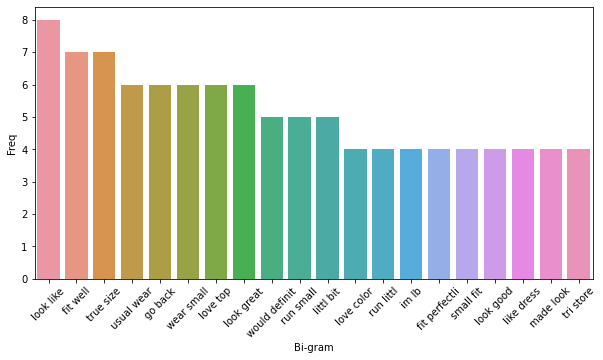

In [48]:
import seaborn as sns
top20_bigram = top2_df.iloc[0:20,:]
fig = plt.figure(figsize = (10, 5))
plot=sns.barplot(x=top20_bigram["Bi-gram"],y=top20_bigram["Freq"])
plot.set_xticklabels(rotation=45,labels = top20_bigram["Bi-gram"])

# Tri-gram

In [49]:
def get_top_n3_words(corpus, n=None):
    vec1 = CountVectorizer(ngram_range=(3,3), 
           max_features=2000).fit(corpus)
    bag_of_words = vec1.transform(corpus)
    sum_words = bag_of_words.sum(axis=0) 
    words_freq = [(word, sum_words[0, idx]) for word, idx in     
                  vec1.vocabulary_.items()]
    words_freq =sorted(words_freq, key = lambda x: x[1], 
                reverse=True)
    return words_freq[:n]

In [51]:
top3_words = get_top_n3_words(data1["Review"], n=200)
top3_df = pd.DataFrame(top3_words)
top3_df.columns=["Tri-gram", "Freq"]
top3_df.head()

,Tri-gram,Freq
0,run littl larg,3
1,run true size,3
2,realli want work,2
3,everi time wear,2
4,look feel cheap,2


[Text(0, 0, 'run littl larg'),
 Text(1, 0, 'run true size'),
 Text(2, 0, 'realli want work'),
 Text(3, 0, 'everi time wear'),
 Text(4, 0, 'look feel cheap'),
 Text(5, 0, 'would say run'),
 Text(6, 0, 'small fit well'),
 Text(7, 0, 'thick good qualiti'),
 Text(8, 0, 'cant wait wear'),
 Text(9, 0, 'fabric beauti love'),
 Text(10, 0, 'look loos model'),
 Text(11, 0, 'dark orang color'),
 Text(12, 0, 'wear cami underneath'),
 Text(13, 0, 'usual wear medium'),
 Text(14, 0, 'made look bigger'),
 Text(15, 0, 'burnt orang color'),
 Text(16, 0, 'want go size'),
 Text(17, 0, 'fit true size'),
 Text(18, 0, 'normal wear small'),
 Text(19, 0, 'usual wear small')]

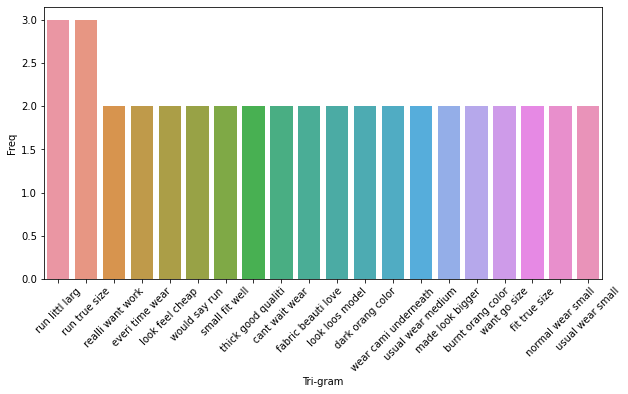

In [52]:
import seaborn as sns
top20_trigram = top3_df.iloc[0:20,:]
fig = plt.figure(figsize = (10, 5))
plot=sns.barplot(x=top20_trigram["Tri-gram"],y=top20_trigram["Freq"])
plot.set_xticklabels(rotation=45,labels = top20_trigram["Tri-gram"])

# WordCloud

In [54]:
string_Total = " ".join(data1["Review"])

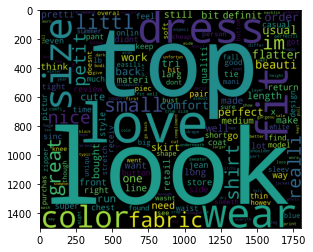

In [55]:
from wordcloud import WordCloud
wordcloud_stw = WordCloud(
                background_color= 'black',
                width = 1800,
                height = 1500
                ).generate(string_Total)
plt.imshow(wordcloud_stw)

In [57]:
from textblob import TextBlob

# Get The Subjectivity
def sentiment_analysis(ds):
    sentiment = TextBlob(ds["Review"]).sentiment
    return pd.Series([sentiment.subjectivity, sentiment.polarity])

# Adding Subjectivity & Polarity
data1[["subjectivity", "polarity"]] = data1.apply(sentiment_analysis, axis=1)

data1

,Review,Rating,subjectivity,polarity
0,absolut wonder silki sexi comfort,4,0.000000,0.000000
1,love dress sooo pretti happen find store im gl...,5,0.712500,0.462500
2,high hope dress realli want work initi order p...,3,0.388065,0.069412
3,love love love jumpsuit fun flirti fabul everi...,5,0.550000,0.520000
4,shirt flatter due adjust front tie perfect len...,5,0.658333,0.458333
...,...,...,...,...
135,nan,4,0.000000,0.000000
136,love vest color look littl brown pictur realli...,4,0.600000,0.269444
137,receiv sky color onlin definetli keep beauti h...,4,0.402083,0.085417
138,obsess peplum coat one usual see shape extrem ...,4,0.593333,0.113333


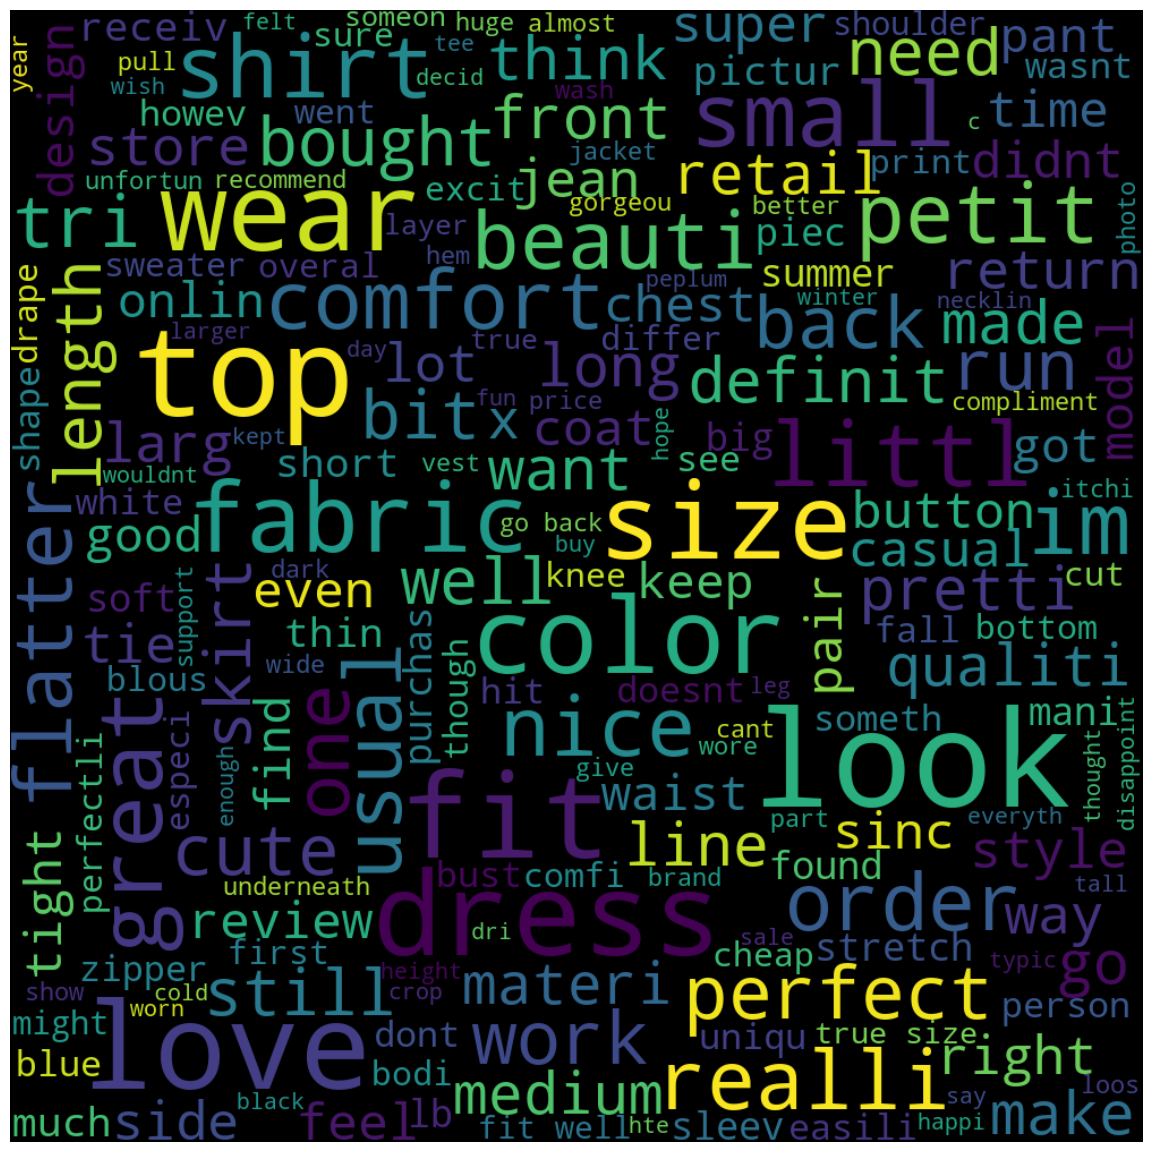

In [58]:
import matplotlib.pyplot as plt
from wordcloud import WordCloud

allwords = " ".join([twts for twts in data1["Review"]])
wordCloud = WordCloud(width = 1000, height = 1000, random_state = 21, max_font_size = 119).generate(allwords)
plt.figure(figsize=(15, 15), dpi=100)
plt.imshow(wordCloud, interpolation = "bilinear")
plt.axis("off")
plt.show()

In [59]:
def analysis(score):
    if score < 0:
        return "Negative"
    elif score == 0:
        return "Neutral"
    else:
        return "Positive"
    
# Create a New Analysis Column
data1["analysis"] = data1["polarity"].apply(analysis)

In [60]:
data1

,Review,Rating,subjectivity,polarity,analysis
0,absolut wonder silki sexi comfort,4,0.000000,0.000000,Neutral
1,love dress sooo pretti happen find store im gl...,5,0.712500,0.462500,Positive
2,high hope dress realli want work initi order p...,3,0.388065,0.069412,Positive
3,love love love jumpsuit fun flirti fabul everi...,5,0.550000,0.520000,Positive
4,shirt flatter due adjust front tie perfect len...,5,0.658333,0.458333,Positive
...,...,...,...,...,...
135,nan,4,0.000000,0.000000,Neutral
136,love vest color look littl brown pictur realli...,4,0.600000,0.269444,Positive
137,receiv sky color onlin definetli keep beauti h...,4,0.402083,0.085417,Positive
138,obsess peplum coat one usual see shape extrem ...,4,0.593333,0.113333,Positive


In [62]:
positive_review = data1[data1['analysis'] == 'Positive']
negative_review = data1[data1['analysis'] == 'Negative']

print('positive tweets')
for i, row in positive_review[:5].iterrows():
  print(' -' + row['Review'])

print('negative tweets')
for i, row in negative_review[:5].iterrows():
  print(' -' + row['Review'])

positive tweets
 -love dress sooo pretti happen find store im glad bc never would order onlin bc petit bought petit love length hit littl knee would definit true midi someon truli petit
 -high hope dress realli want work initi order petit small usual size found outrag small small fact could zip reorder petit medium ok overal top half comfort fit nice bottom half tight layer sever somewhat cheap net layer imo major design flaw net layer sewn directli zipper c
 -love love love jumpsuit fun flirti fabul everi time wear get noth great compliment
 -shirt flatter due adjust front tie perfect length wear leg sleeveless pair well cardigan love shirt
 -love traci rees dress one petit feet tall usual wear p brand dress pretti packag lot dress skirt long full overwhelm small frame stranger alter shorten narrow skirt would take away embellish garment love color idea style work return dress
negative tweets
 -ade basket hte last mintu see would look like person store pick went teh darkler color pale

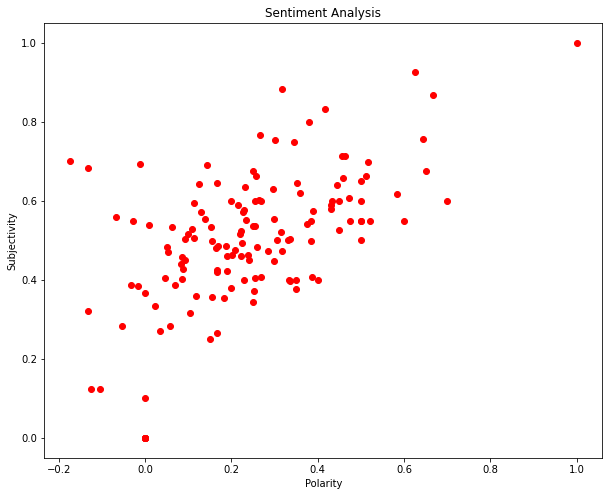

In [63]:
plt.figure(figsize=(10, 8))

for i in range(0, data1.shape[0]):
    plt.scatter(data1["polarity"][i], data1["subjectivity"][i], color = "Red")

plt.title("Sentiment Analysis") # Add The Graph Title
plt.xlabel("Polarity") # Add The X-Label
plt.ylabel("Subjectivity") # Add The Y-Label
plt.show() # Showing The Graph

In [65]:
len(positive_review) / len(negative_review)

11.0